In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv("predictive_maintenance.csv")

In [13]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [15]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [18]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

# Visualizing class balance

Text(0.5, 1.0, 'Distribution of Failure Types')

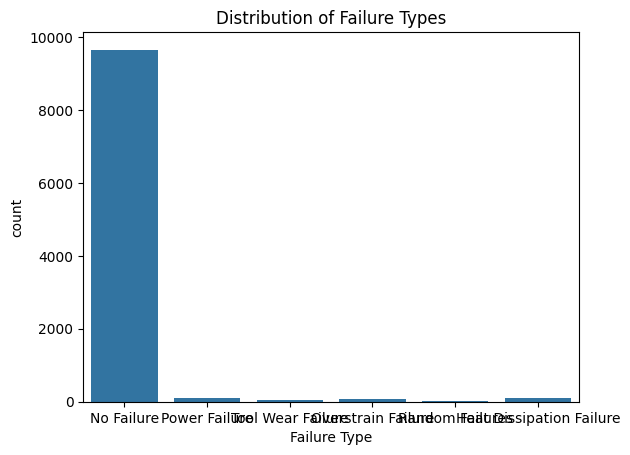

In [17]:
sns.countplot(x='Failure Type', data=df)
plt.title('Distribution of Failure Types')

Target
0    9661
1     339
Name: count, dtype: int64


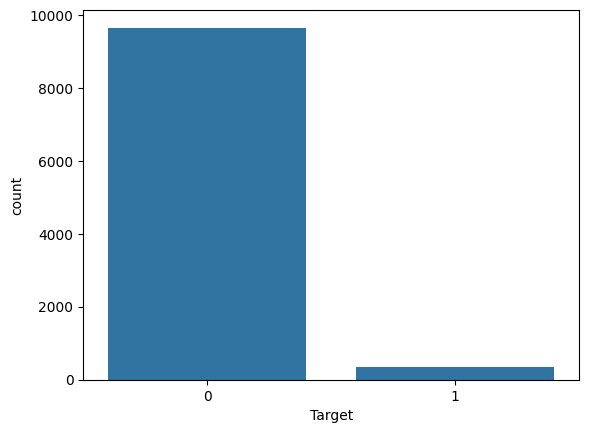

In [20]:
print(df['Target'].value_counts())
sns.countplot(x='Target', data=df)
plt.show()

# Preprocessing

In [27]:
df.drop('UDI', axis=1, inplace=True)
df.drop('Product ID', axis=1, inplace=True)
df.drop('Failure Type', axis=1, inplace=True)

In [28]:
df = pd.get_dummies(df, columns=['Type'], drop_first=True)

In [29]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,False,True
1,298.2,308.7,1408,46.3,3,0,True,False
2,298.1,308.5,1498,49.4,5,0,True,False
3,298.2,308.6,1433,39.5,7,0,True,False
4,298.2,308.7,1408,40.0,9,0,True,False


In [30]:
X = df.drop('Target', axis=1)
y = df['Target']

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test splits

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


# Training models

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced'),
    "SVM": SVC(class_weight='balanced')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred))


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      1932
           1       0.14      0.82      0.24        68

    accuracy                           0.82      2000
   macro avg       0.57      0.82      0.57      2000
weighted avg       0.96      0.82      0.88      2000

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1932
           1       0.89      0.49      0.63        68

    accuracy                           0.98      2000
   macro avg       0.94      0.74      0.81      2000
weighted avg       0.98      0.98      0.98      2000

=== SVM ===
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1932
           1       0.28      0.91      0.43        68

    accuracy                           0.92      2000
   macro avg       0.64      0.91      0.69      2000
weighted avg